### Heatmap of Correlation Matrix

Correlation Matrix including Demand Forecast:
                                  Weekly_Sales  inventory level  Temperature  Past promotion of product in lac  demand forecast
Weekly_Sales                          1.000000        -0.024673    -0.244398                         -0.086787         0.219408
inventory level                      -0.024673         1.000000    -0.008283                          0.038497        -0.070239
Temperature                          -0.244398        -0.008283     1.000000                          0.251531        -0.110513
Past promotion of product in lac     -0.086787         0.038497     0.251531                          1.000000        -0.466979
demand forecast                       0.219408        -0.070239    -0.110513                         -0.466979         1.000000


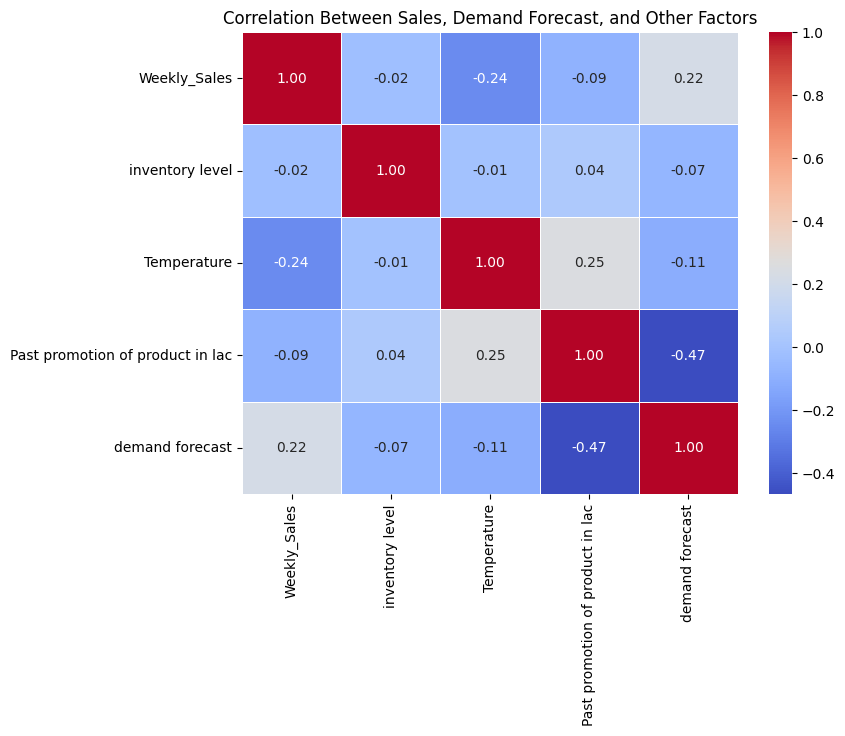

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os
from pathlib import Path

# Define the path to the Excel file
FILE_PATH = Path("Retail_inventory.xlsx")  # if in same directory as notebook

# Load data
df = pd.read_excel(FILE_PATH, engine='openpyxl')

# Convert the 'Date' column to datetime format for time series analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

# Correlation Analysis including 'demand forecast'
correlation_matrix = df[['Weekly_Sales', 'inventory level', 'Temperature', 'Past promotion of product in lac', 'demand forecast']].corr()

# Print correlation matrix as a table
print("Correlation Matrix including Demand Forecast:")
print(correlation_matrix.to_string())

# Plot heatmap of the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sales, Demand Forecast, and Other Factors')
plt.show()


### Exponential smoothing model for Sales forecast

#### Why use ETS model with quarterly data?

#### 1. Data structure
- Original weekly data is sparse and irregular
- Combining store data reduces gaps
- Quarterly aggregation smooths out noise and missing values

#### 2. ETS model benefits
- Handles multiple patterns (trend, seasonality)
- Works well with limited data
- Easy to understand and explain
- More robust than complex models like ARIMA

#### 3. Why quarterly?
- Aligns with business cycles
- Provides enough data points for patterns
- Balances detail vs. stability
- Matches financial reporting periods

#### 4. Practical advantages
- Better forecasting accuracy
- More stable predictions
- Easier for inventory planning
- Handles missing data well

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


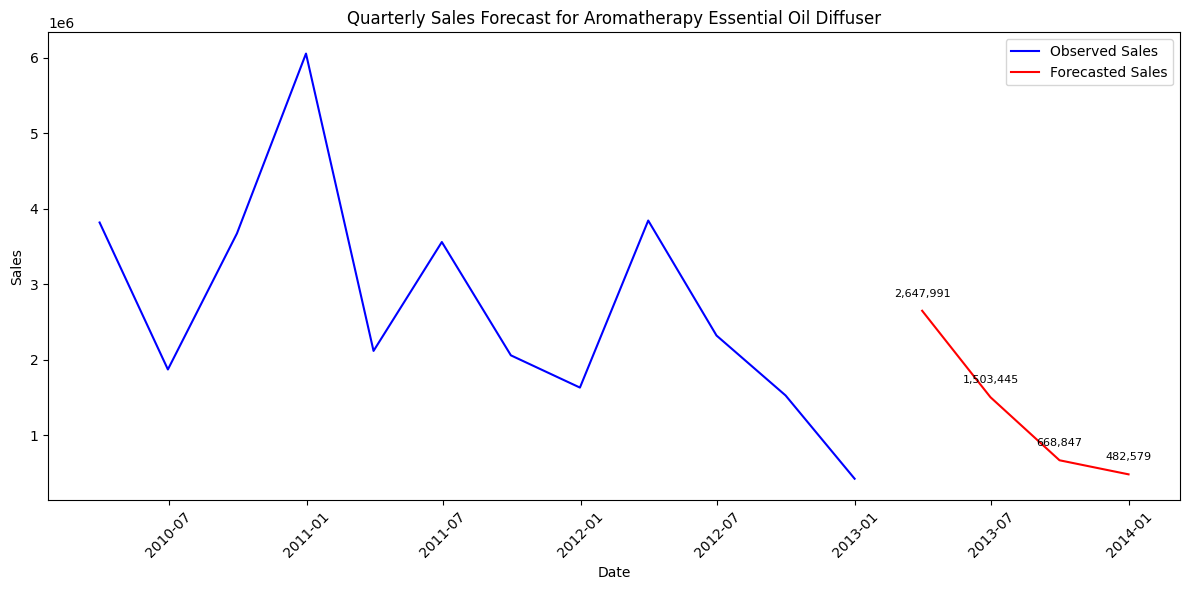


Forecasted Sales for the next 4 quarters:
2013-03-31    2.647991e+06
2013-06-30    1.503445e+06
2013-09-30    6.688469e+05
2013-12-31    4.825787e+05
Freq: QE-DEC, dtype: float64


In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = r"D:\UNI STUDY\Exchange\SUFE studying\Time series analysis\FINAL PROJ\DATA ANALYSIS PROJECT\Retail_inventory.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Filter data for the specific product
product_data = df[df['Product'] == 'Aromatherapy essential oil diffuser']

# Set the Date column as the index
product_data.set_index('Date', inplace=True)

# Aggregate sales by quarter (using QE for quarter end)
quarterly_sales = product_data.resample('QE')['Weekly_Sales'].sum()

try:
    # Fit the ETS model
    ets_model = ExponentialSmoothing(quarterly_sales, 
                                   trend='add',
                                   seasonal='add',
                                   seasonal_periods=4,
                                   damped_trend=True)
    
    ets_fit = ets_model.fit(optimized=True,
                           remove_bias=True)
    
    # Forecast the next 4 quarters
    forecast = ets_fit.forecast(steps=4)
    
    # Ensure no negative values
    forecast = forecast.clip(lower=0)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(quarterly_sales.index, quarterly_sales, label='Observed Sales', color='blue')
    plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
    
    # Add data labels for forecast points
    for x, y in zip(forecast.index, forecast.values):
        plt.annotate(f'{y:,.0f}', 
                    (x, y),
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                    fontsize=8)
    
    plt.title('Quarterly Sales Forecast for Aromatherapy Essential Oil Diffuser')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print the forecasted sales
    print("\nForecasted Sales for the next 4 quarters:")
    print(forecast)
    
except Exception as e:
    print(f"\nError in forecasting: {str(e)}")
    print("\nQuarterly sales data:")
    print(quarterly_sales)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retval

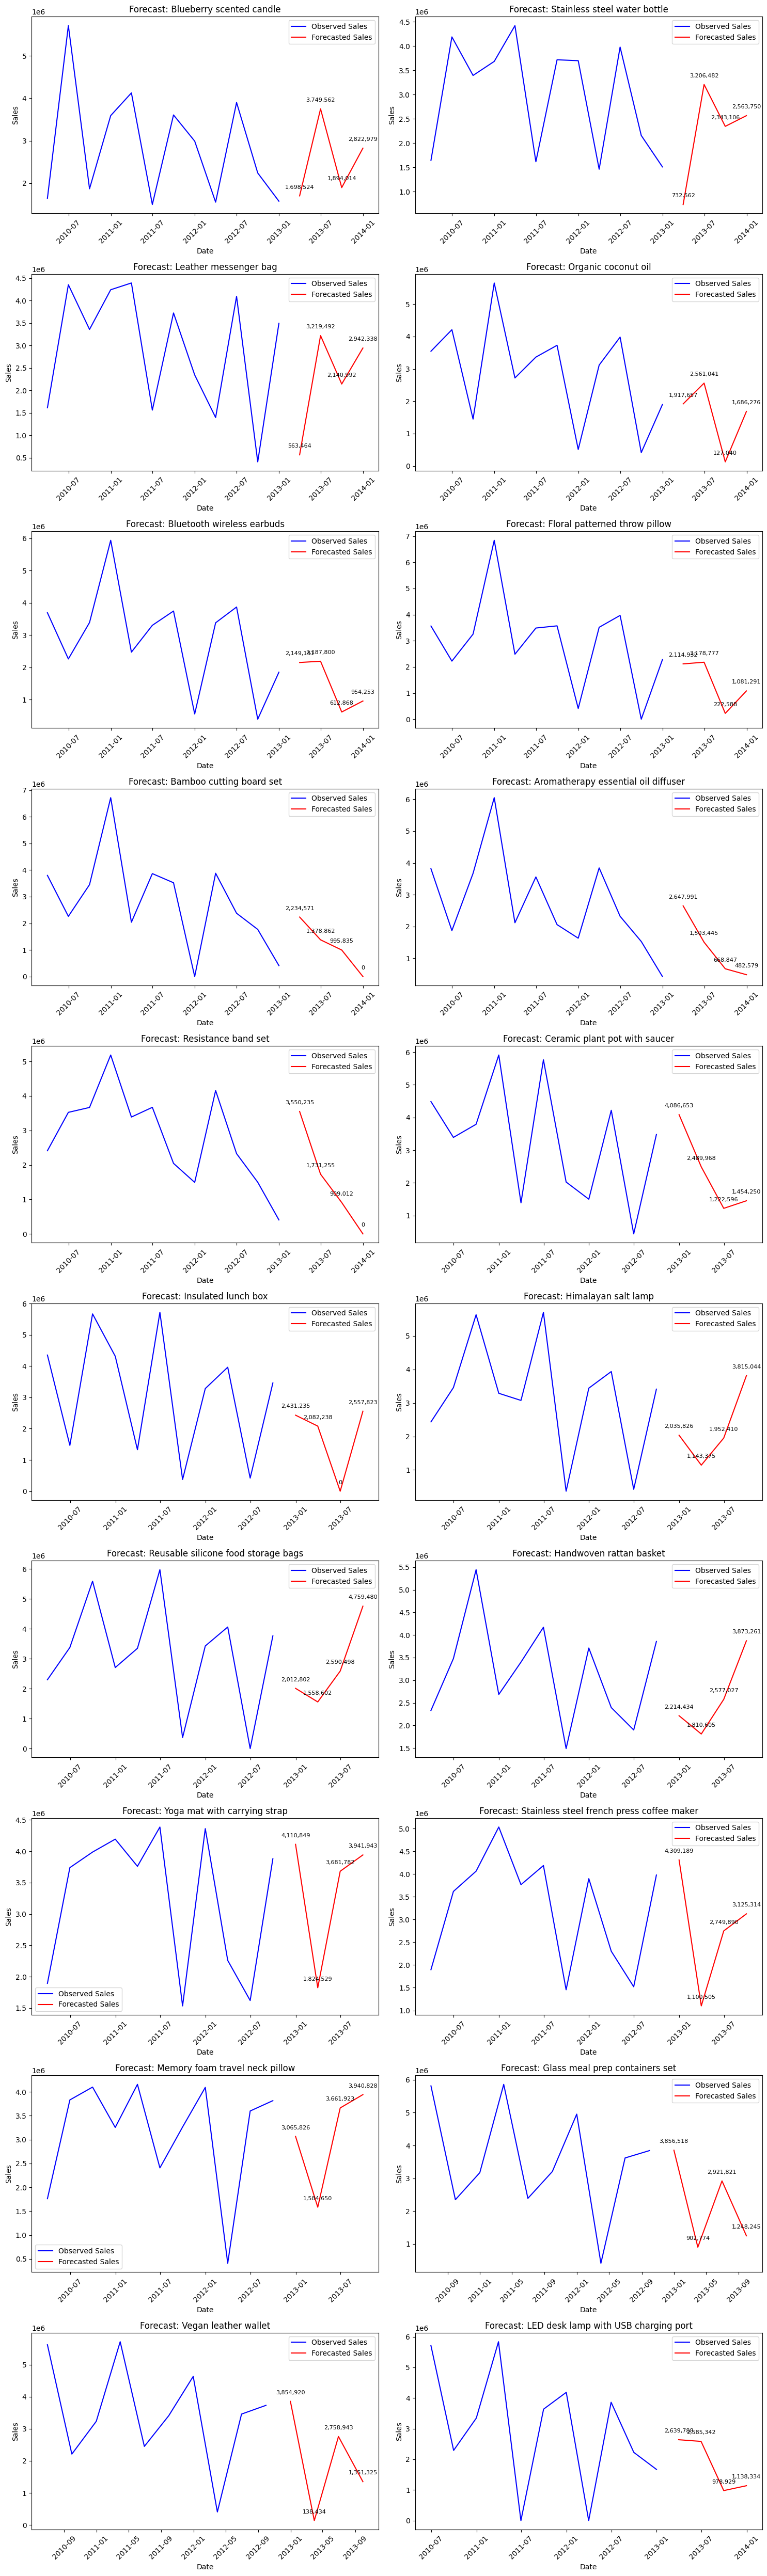

In [3]:
# Get unique products
unique_products = df['Product'].unique()

# Create subplots based on number of products
n_products = len(unique_products)
n_cols = 2
n_rows = (n_products + 1) // 2

plt.figure(figsize=(15, 5*n_rows))

# Loop through each product
for idx, product in enumerate(unique_products):
    try:
        # Filter data for the current product
        product_data = df[df['Product'] == product]
        product_data.set_index('Date', inplace=True)
        
        # Aggregate sales by quarter
        quarterly_sales = product_data.resample('QE')['Weekly_Sales'].sum()
        
        # Fit and forecast with ETS model
        ets_model = ExponentialSmoothing(quarterly_sales, 
                                       trend='add',
                                       seasonal='add',
                                       seasonal_periods=4,
                                       damped_trend=True)
        
        ets_fit = ets_model.fit(optimized=True, remove_bias=True)
        forecast = ets_fit.forecast(steps=4).clip(lower=0)
        
        # Create subplot
        plt.subplot(n_rows, n_cols, idx + 1)
        plt.plot(quarterly_sales.index, quarterly_sales, label='Observed Sales', color='blue')
        plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
        
        # Add data labels for forecast points
        for x, y in zip(forecast.index, forecast.values):
            plt.annotate(f'{y:,.0f}', 
                        (x, y),
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center',
                        fontsize=8)
        
        plt.title(f'Forecast: {product}')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.xticks(rotation=45)
        
    except Exception as e:
        continue

plt.tight_layout()
plt.show()

## Inventory planning model:

- **Uses estimated unit costs** from sales data.
  
$$
\text{EOQ} = \sqrt{\frac{2 \times \text{annual\_demand} \times \text{ordering\_cost}}{\text{holding\_cost}}}
$$

  
- **Includes safety stock** and **reorder points**.
- **Calculates total annual cost**, including both ordering and holding costs.


### Assumptions of the model:

- **20% annual holding cost rate**.
- **$100 fixed ordering cost**.
- **14-day lead time**.
- **95% service level**.


Inventory Planning Metrics:

All values are in currency units:
                                                EOQ  Safety_Stock  Reorder_Point  Avg_Daily_Demand  Std_Daily_Demand  Unit_Cost  Holding_Cost
Blueberry scented candle                   19674.97     563453.17     3306841.67         195956.32          91551.73     184.77         36.95
Stainless steel water bottle               19673.86     642906.17     3478633.80         202551.97         104461.51     191.01         38.20
Leather messenger bag                      19652.91     585843.34     3383099.17         199803.99          95189.76     188.82         37.76
Organic coconut oil                        19707.22     579244.71     3347960.07         197765.38          94117.59     185.86         37.17
Bluetooth wireless earbuds                 19701.88     574771.10     3361816.98         199074.71          93390.70     187.19         37.44
Floral patterned throw pillow              19685.99     614538.30     3461726.81     

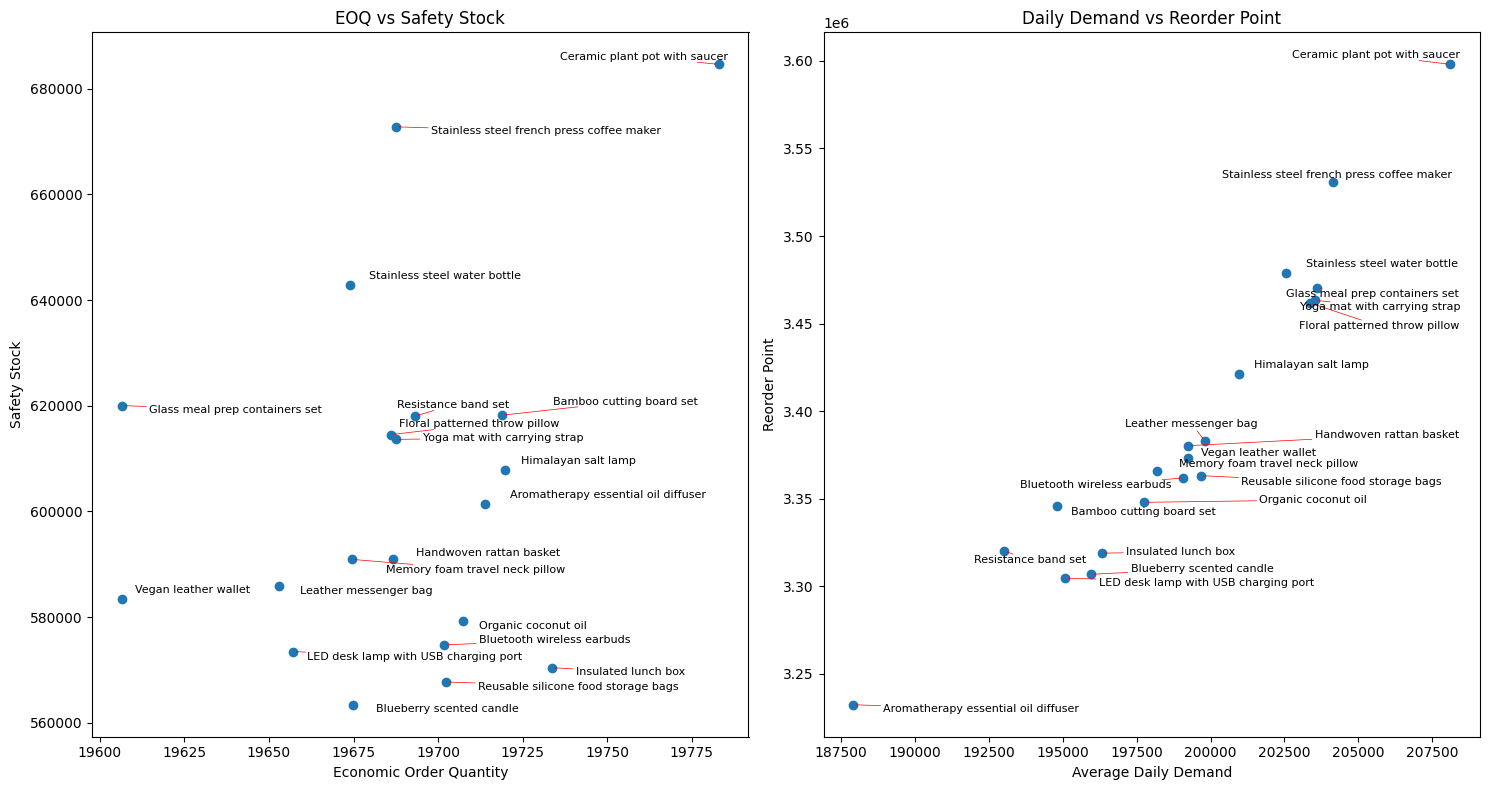

In [4]:
from scipy.stats import norm

def estimate_unit_cost(product_data):
    """Estimate unit cost from revenue and demand forecast"""
    avg_weekly_revenue = product_data['Weekly_Sales'].mean()
    avg_weekly_demand = product_data['demand forecast'].mean()
    if avg_weekly_demand > 0:
        return avg_weekly_revenue / avg_weekly_demand
    return np.nan

def calculate_inventory_metrics(product_data):
    """Calculate inventory metrics for a given product"""
    
    # Calculate demand parameters
    daily_demand = product_data['Weekly_Sales'] / 7
    avg_daily_demand = daily_demand.mean()
    std_daily_demand = daily_demand.std()
    
    # Calculate unit cost and holding cost
    unit_cost = estimate_unit_cost(product_data)
    holding_cost_rate = 0.20  # 20% of inventory value per year
    holding_cost = holding_cost_rate * unit_cost  # Annual holding cost per unit
    
    # Other parameters
    ordering_cost = 100  # Fixed cost per order in currency
    lead_time_days = 14
    service_level = 0.95
    z_score = norm.ppf(service_level)
    
    # Calculate EOQ with proper holding cost
    annual_demand = avg_daily_demand * 365
    eoq = np.sqrt((2 * annual_demand * ordering_cost) / holding_cost)
    
    # Calculate Safety Stock
    lead_time_demand_std = std_daily_demand * np.sqrt(lead_time_days)
    safety_stock = z_score * lead_time_demand_std
    
    # Calculate Reorder Point
    lead_time_demand = avg_daily_demand * lead_time_days
    reorder_point = lead_time_demand + safety_stock
    
    return {
        'EOQ': eoq,
        'Safety_Stock': safety_stock,
        'Reorder_Point': reorder_point,
        'Avg_Daily_Demand': avg_daily_demand,
        'Std_Daily_Demand': std_daily_demand,
        'Unit_Cost': unit_cost,
        'Holding_Cost': holding_cost
    }

# Get unique products
unique_products = df['Product'].unique()

# Calculate metrics for each product
inventory_plans = {}
for product in unique_products:
    product_data = df[df['Product'] == product].copy()
    inventory_plans[product] = calculate_inventory_metrics(product_data)

# Create summary DataFrame
summary_df = pd.DataFrame.from_dict(inventory_plans, orient='index')
summary_df = summary_df.round(2)

# Display results
print("Inventory Planning Metrics:")
print("\nAll values are in currency units:")
print(summary_df.to_string())

# Visualize the results with better label placement
plt.figure(figsize=(15, 8))

# Plot EOQ vs Safety Stock
plt.subplot(1, 2, 1)
plt.scatter(summary_df['EOQ'], summary_df['Safety_Stock'])
plt.xlabel('Economic Order Quantity')
plt.ylabel('Safety Stock')
plt.title('EOQ vs Safety Stock')

# Add product labels with adjusttext library for better placement
from adjustText import adjust_text

texts = []
for i, product in enumerate(unique_products):
    texts.append(plt.text(summary_df.iloc[i]['EOQ'], 
                         summary_df.iloc[i]['Safety_Stock'],
                         product,
                         fontsize=8))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

# Plot Average Daily Demand vs Reorder Point
plt.subplot(1, 2, 2)
plt.scatter(summary_df['Avg_Daily_Demand'], summary_df['Reorder_Point'])
plt.xlabel('Average Daily Demand')
plt.ylabel('Reorder Point')
plt.title('Daily Demand vs Reorder Point')

# Add product labels with adjusttext
texts = []
for i, product in enumerate(unique_products):
    texts.append(plt.text(summary_df.iloc[i]['Avg_Daily_Demand'], 
                         summary_df.iloc[i]['Reorder_Point'],
                         product,
                         fontsize=8))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.tight_layout()
plt.show()